In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
from optimalEmbedding_sampling import run_optEmbedding_sampling
from GCCM_sampling import run_GCCM_sampling
from diffusionMean import run_versions
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from diffusion import remove_linear_signals, run_sim, show_patterns
from plot import get_mean, get_interval, make_Eplot, make_Lplot

%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
size=100
np.random.seed(seed=10)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

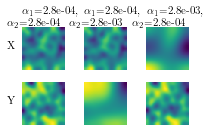

In [6]:
a_1 = [2.8e-4, 2.8e-4, 2.8e-3]
a_2 = [2.8e-4, 2.8e-3, 2.8e-4]

fig, axes = plt.subplots(2,3, figsize=(3, 2))

for i, (a1,a2) in enumerate(zip(a_1, a_2)):
    X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2, plot=False)

    ax1 = axes[0, i]
    ax2 = axes[1, i]
                
    show_patterns(X, ax=ax1)
    ax1.set_title(fr'$\alpha_1$={a1:.1e},$\\$ $\alpha_2$={a2:.1e}', fontsize=11)
    show_patterns(Y, ax=ax2)
    if a1==a2:
        ax1.text(-0.25, 0.5, 'X', transform=ax1.transAxes, fontsize=11, horizontalalignment='center')
        ax2.text(-0.25, 0.5, 'Y', transform=ax2.transAxes, fontsize=11, horizontalalignment='center')
    
plt.tight_layout()
plt.savefig('plots/diffusion_short/mean_data_2.pdf', bbox_inches='tight')

In [37]:
a_1 = [2.8e-4, 2.8e-4, 2.8e-3]
a_2 = [2.8e-4, 2.8e-3, 2.8e-4]

for i, (a1,a2) in enumerate(zip(a_1, a_2)):
    X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2, plot=False)
    correlation_coefficient, p_value = pearsonr(X.flatten(), Y.flatten())
    print(correlation_coefficient, p_value)

0.25583484448643745 3.4048040318335616e-149
0.29532778865340925 2.018312106791134e-200
0.20718590127349162 2.1443745551037304e-97


In [6]:
dims = np.arange(1,9)
lib_sizes = np.arange(10,101,30)

In [47]:
sample=50
c=0.1
results = run_versions(c=c, sample=sample)

running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 6
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 9
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 10
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 11
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 12
x_xmap_y
Constructing embedding
y_x

In [59]:
with open('diffusion_data/mean50_c01_t30.pkl', 'wb') as pickle_file:
    pickle.dump(results, pickle_file)

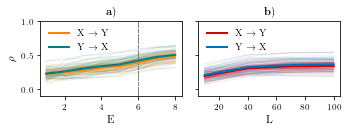

In [57]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results.keys():
    result_E = results[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results.keys():
    result_L = results[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/mean50_c01.pdf', bbox_inches='tight')

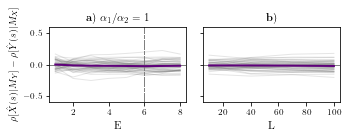

In [85]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ediff = []
for k in results.keys():
    result_E = results[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)


ax[0].set_ylim(-0.6,0.6)
ax[0].set_title(r'$\textbf a)$ $\alpha_1/\alpha_2=1$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results.keys():
    result_L = results[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/meandiff50_c01.pdf', bbox_inches='tight')

In [49]:
sample=50
c=0.1
results_diff = run_versions(c=c, sample=sample)

running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 9
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 11
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 12
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 13
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 14
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 15
x_xmap_y
Constructing embedding
y

In [50]:
with open('diffusion_results/mean50_c01_t30_diff01.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff, pickle_file)

In [45]:
with open('diffusion_results/mean50_c01_t30_diff01.pkl', 'rb') as pickle_file:
    results_diff = pickle.load(pickle_file)

In [49]:
Ediff = []
for k in results_diff.keys():
    Ediff.append(y_xmap_x-x_xmap_y)
dims[np.array(Ediff).mean(axis=0).argmax()]

4

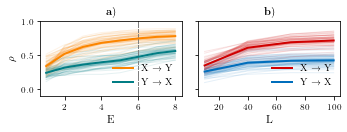

In [70]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff.keys():
    result_L = results_diff[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/mean50_c01_d01.pdf', bbox_inches='tight')

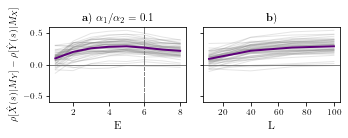

In [84]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ediff = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.6,0.6)
ax[0].set_title(r'$\textbf a)$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff.keys():
    result_L = results_diff[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/meandiff50_c01_d01.pdf', bbox_inches='tight')

In [39]:
sample=50
c=0.1
results_diff_nores = run_versions(c=c, sample=sample)

0.00028 0.0028
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 7
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 9
x_xmap_y
Constructing e

In [41]:
with open('diffusion_results/mean50_c01_t30_diff01_nolowerbound.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff_nores, pickle_file)

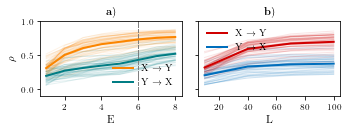

In [42]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff_nores.keys():
    result_E = results_diff_nores[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff_nores.keys():
    result_L = results_diff_nores[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/mean50_c01_d01_nolowerbound.pdf', bbox_inches='tight')

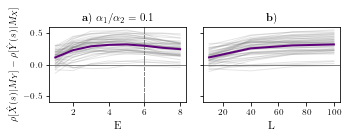

In [43]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ediff = []
for k in results_diff_nores.keys():
    result_E = results_diff_nores[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.6,0.6)
ax[0].set_title(r'$\textbf a)$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff_nores.keys():
    result_L = results_diff_nores[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/meandiff50_c01_d01_nolowerbound.pdf', bbox_inches='tight')

In [72]:
sample=50
c=0.1
results_diff2 = run_versions(c=c, sample=sample)

running with seed 6
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 9
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 11
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 13
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 16
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 17
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 18
x_xmap_y
Constructing embedding
y

In [73]:
with open('diffusion_results/mean50_c01_t30_diff10.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff2, pickle_file)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


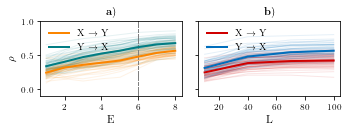

In [76]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff2.keys():
    result_E = results_diff2[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff2.keys():
    result_L = results_diff2[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/mean50_c01_d10.pdf', bbox_inches='tight')

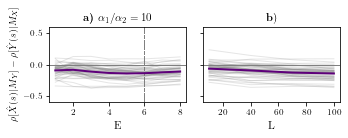

In [87]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ediff = []
for k in results_diff2.keys():
    result_E = results_diff2[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.6,0.6)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=10$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff2.keys():
    result_L = results_diff2[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/meandiff50_c01_d10.pdf', bbox_inches='tight')

In [13]:
sample=50
c=0
results_diff_0 = run_versions(c=c, sample=sample)

0.00028 0.0028
running with seed 15
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 16
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 17
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 28
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 33
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 35
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 36
x_xmap_y
Constru

In [14]:
with open('diffusion_results/mean50_c00_t30_diff01.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff_0, pickle_file)

In [17]:
with open('diffusion_results/mean50_c01_t30_diff01.pkl', 'rb') as pickle_file:
    results_diff = pickle.load(pickle_file)

In [23]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [30]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

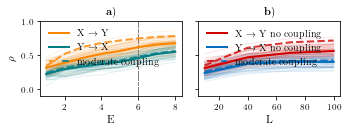

In [36]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff_0.keys():
    result_E = results_diff_0[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')
p1,=ax[0].plot(dims, np.array(Eyx).mean(axis=0), '--', alpha=0.8, c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p2,=ax[0].plot(dims, np.array(Exy).mean(axis=0), '--', alpha=0.8,  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X', 'moderate coupling'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff_0.keys():
    result_L = results_diff_0[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')
p1,=ax[1].plot(lib_sizes, np.array(Lyx).mean(axis=0), '--', alpha=0.8, c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p2,=ax[1].plot(lib_sizes, np.array(Lxy).mean(axis=0), '--', alpha=0.8,  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')


ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4, (p1, p2)], [r'X $\rightarrow$ Y no coupling', r'Y $\rightarrow$ X no coupling', 'moderate coupling'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/mean50_c00_d01.pdf', bbox_inches='tight')

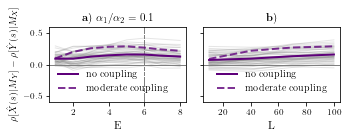

In [40]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ediff = []
for k in results_diff_0.keys():
    result_E = results_diff_0[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2, label='no coupling')
p4,=ax[0].plot(dims, np.array(Ediff_01).mean(axis=0), '--', alpha=0.8, c='#5e007a', lw=2, label='moderate coupling')


ax[0].set_ylim(-0.6,0.6)
ax[0].set_title(r'$\textbf a)$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
legend = ax[0].legend(scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff_0.keys():
    result_L = results_diff_0[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'no coupling')
p4,=ax[1].plot(lib_sizes, np.array(Ldiff_01).mean(axis=0), '--', alpha=0.8, c='#5e007a', lw=2,  label = r'moderate coupling')
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')

legend = ax[1].legend(scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/diffusion_short/meandiff50_c00_d01.pdf', bbox_inches='tight')

In [41]:
np.array(Ldiff).mean(axis=0)

array([0.07281154, 0.09366925, 0.13235248, 0.15994976])

In [42]:
 np.array(Ldiff_01).mean(axis=0)

array([0.08977627, 0.21923474, 0.27137129, 0.2905437 ])

In [11]:
from nobound_diffusionMean import run_versions_

In [15]:
sample=50
c=0
results_diff_0_nores = run_versions_(c=c, sample=sample)

0.00028 0.0028
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructing e

In [16]:
with open('diffusion_results/mean50_c00_t30_diff01_nolowerbound.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff_0_nores, pickle_file)

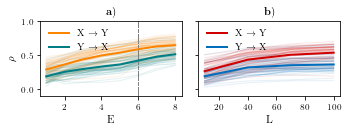

In [20]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff_0_nores.keys():
    result_E = results_diff_0_nores[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff_0_nores.keys():
    result_L = results_diff_0_nores[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
                     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots/diffusion_short/mean50_c00_d01_nocoupling.pdf', bbox_inches='tight')

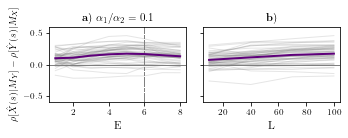

In [21]:
fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)

Ediff = []
for k in results_diff_0_nores.keys():
    result_E = results_diff_0_nores[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=6, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.6,0.6)
ax[0].set_title(r'$\textbf a)$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
#ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff_0_nores.keys():
    result_L = results_diff_0_nores[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots/diffusion_short/meandiff50_c01_d01_nolowerbound.pdf', bbox_inches='tight')